# Part Three: Dataset Analysis c Kaggle.com

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

__Прочитайте csv файл__

In [2]:
df = pd.read_csv('bestsellers with categories.csv')

__Output the first five lines__

In [31]:
df.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


__Виведіть розміри датасету__

In [32]:
df.shape

(550, 7)

__Change the case to lower case and replace the space with an underscore__

In [44]:
df.columns = [title.lower().replace(' ', '_') for title in df.columns]

__Questions and Answers__

In [43]:
number_of_books = df.shape[0]

print(f'How many books does the dataset store data?\nAnswer: {number_of_books}')

How many books does the dataset store data?
Answer: 550


In [46]:
isna_res = df.isna().sum()

print(f'Are there gaps in any variables? (Yes / No)\nAnswer: {'Yes' if isna_res.any() else 'No'}')

Are there gaps in any variables? (Yes / No)
Answer: No


In [47]:
unique_values_in_genre = df['genre'].unique()
print(f'What are the unique genres?\nAnswer: {', '.join(unique_values_in_genre.tolist())}')

What are the unique genres?
Answer: Non Fiction, Fiction


In [48]:
min_price = df['price'].min()
max_price = df['price'].max()
mean_price = df['price'].mean()
median_price = df['price'].median()

print(f'Minimum price?\nAnswer: {min_price}')
print(f'Maximum price?\nAnswer: {max_price}')
print(f'Average price?\nAnswer: {mean_price}')
print(f'Median price??\nAnswer: {median_price}')

Minimum price?
Answer: 0
Maximum price?
Answer: 105
Average price?
Answer: 13.1
Median price??
Answer: 11.0


In [52]:
highest_rating = df['user_rating'].max()
print(f'What is the highest rating in the dataset?\nAnswer: {highest_rating}')

What is the highest rating in the dataset?
Answer: 4.9


In [55]:
books_with_highest_rating = df[df['user_rating'] == highest_rating]['name']
print(f'How many books have this rating?\nAnswer: {len(books_with_highest_rating)}')

How many books have this rating?
Answer: 52


In [56]:
bigest_reviewes_number = df['reviews'].max()
book_with_bigest_reviewes_number = df[df['reviews'] == bigest_reviewes_number]['name']
print(f'Which book has the most reviews?\nAnswer: {book_with_bigest_reviewes_number.to_list()[0]}')

Which book has the most reviews?
Answer: Where the Crawdads Sing


In [14]:
top_50_books_in_2015 = df[df['year'] == 2015].sort_values(by='user_rating', ascending=False)[:50]
most_expensive_book_in_top_50 = top_50_books_in_2015[top_50_books_in_2015['price'] == top_50_books_in_2015['price'].max()]['name'].to_list()[0]
print(f'З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча?\nВідповідь: {most_expensive_book_in_top_50}')

З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча?
Відповідь: Publication Manual of the American Psychological Association, 6th Edition


In [15]:
top_50_books_in_2010 = df[df['year'] == 2010].sort_values(by='user_rating', ascending=False)[:50]
numer_of_fiction_books_in_top_50_2010_year = top_50_books_in_2010[top_50_books_in_2010['genre'] == 'Fiction']
print(f'Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році?\nВідповідь: {len(numer_of_fiction_books_in_top_50_2010_year)}')

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році?
Відповідь: 20


In [16]:
books_with_rating_4_9_in_2010_2011_years = df[df['year'].isin([2010, 2011]) | df['user_rating'] == 4.9]
print(f'Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках?\nВідповідь: {len(books_with_rating_4_9_in_2010_2011_years)}')

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках?
Відповідь: 0


In [17]:
sorted_by_price_books_in_2015_year_and_less_8_dollars = df[(df['year'] == 2015) | (df['price'] < 8)].sort_values(by='price')
latest_book_in_sorted_list = sorted_by_price_books_in_2015_year_and_less_8_dollars.iloc[-1]['name']
print(f'Яка книга остання у відсортованому списку?\nВідповідь: {latest_book_in_sorted_list}')

Яка книга остання у відсортованому списку?
Відповідь: Publication Manual of the American Psychological Association, 6th Edition


In [18]:
grouped_by_genre = df.groupby(by='genre')['price']
print(f'Максимальна ціна для жанру Fiction?\nВідповідь: {grouped_by_genre.agg('max')['Fiction']}')

Максимальна ціна для жанру Fiction?
Відповідь: 82


In [19]:
print(f'Мінімальна ціна для жанру Fiction?\nВідповідь: {grouped_by_genre.agg('min')['Fiction']}')

Мінімальна ціна для жанру Fiction?
Відповідь: 0


In [20]:
print(f'Максимальна ціна для жанру Non Fiction?\nВідповідь: {grouped_by_genre.agg('max')['Non Fiction']}')

Максимальна ціна для жанру Non Fiction?
Відповідь: 105


In [21]:
print(f'Мінімальна ціна для жанру Non Fiction?\nВідповідь: {grouped_by_genre.agg('min')['Non Fiction']}')

Мінімальна ціна для жанру Non Fiction?
Відповідь: 0


In [22]:
grouped_by_author = df.groupby('author').agg({'name': 'count'}).reset_index()

In [23]:
print(f'Якої розмірності вийшла таблиця?\nВідповідь: {grouped_by_author.shape}')

Якої розмірності вийшла таблиця?
Відповідь: (248, 2)


In [24]:
print(f'Який автор має найбільше книг?\nВідповідь: {grouped_by_author.loc[grouped_by_author['name'].idxmax(), 'author']}')

Який автор має найбільше книг?
Відповідь: Jeff Kinney


In [25]:
print(f'Скільки книг цього автора?\nВідповідь: {grouped_by_author['name'].max()}')

Скільки книг цього автора?
Відповідь: 12


In [26]:
grouped_by_author_mean_rating = df.groupby(by='author')['user_rating'].mean().reset_index()

In [27]:
print(f'У якого автора середній рейтинг мінімальний?\nВідповідь: {grouped_by_author_mean_rating.loc[grouped_by_author_mean_rating['user_rating'].idxmin(), 'author']}')

У якого автора середній рейтинг мінімальний?
Відповідь: Donna Tartt


In [28]:
print(f'Який у цього автора середній рейтинг?\nВідповідь: {grouped_by_author_mean_rating['user_rating'].min()}')

Який у цього автора середній рейтинг?
Відповідь: 3.9


In [33]:
print(f'Який автор перший у списку?\nВідповідь: {join_number_of_books_and_mean_rating.loc[0, 'author']}')

Який автор перший у списку?
Відповідь: Muriel Barbery


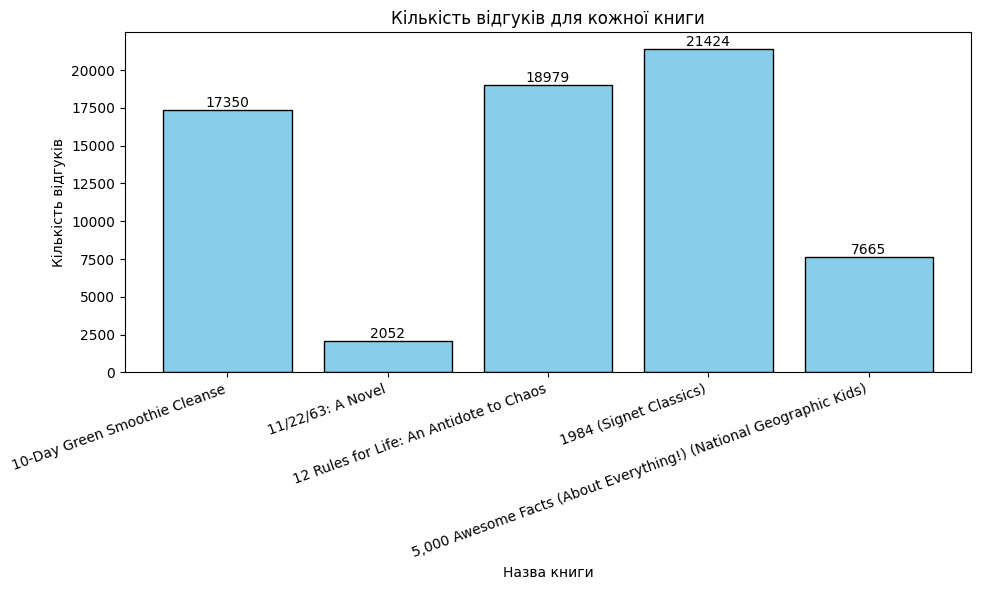

In [38]:
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(df[:5]['name'][:10], df[:5]['reviews'], color='skyblue', edgecolor='black')

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

ax.set_xlabel('Назва книги')
ax.set_ylabel('Кількість відгуків')
ax.set_title('Кількість відгуків для кожної книги')

plt.xticks(rotation=20, ha='right')

plt.tight_layout()
plt.show()

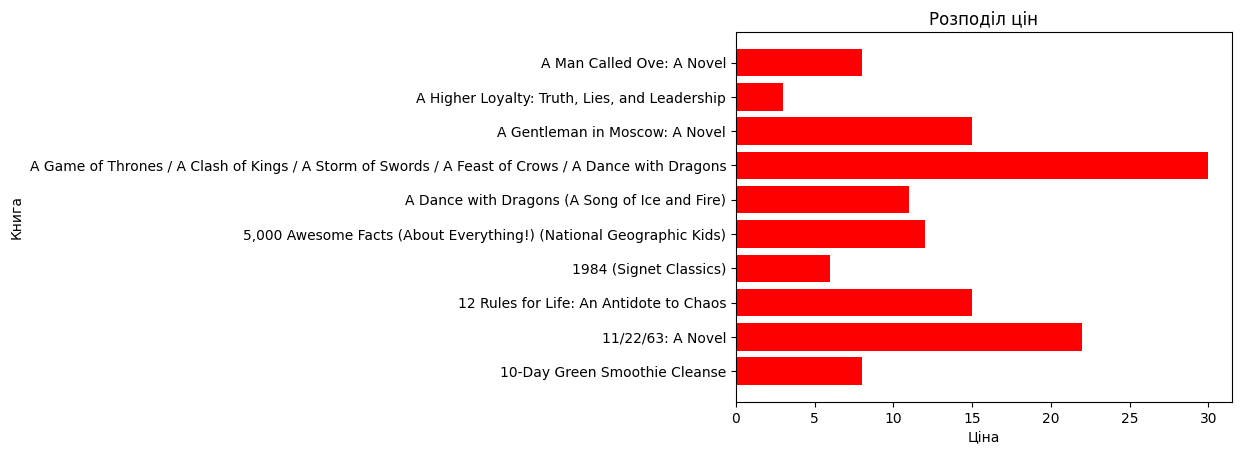

In [39]:
plt.barh(
    df['name'][:10],
    df['price'][:10],
    color='r'
)

plt.ylabel('Книга')
plt.xlabel('Ціна')
plt.title('Pозподіл цін')
plt.show()

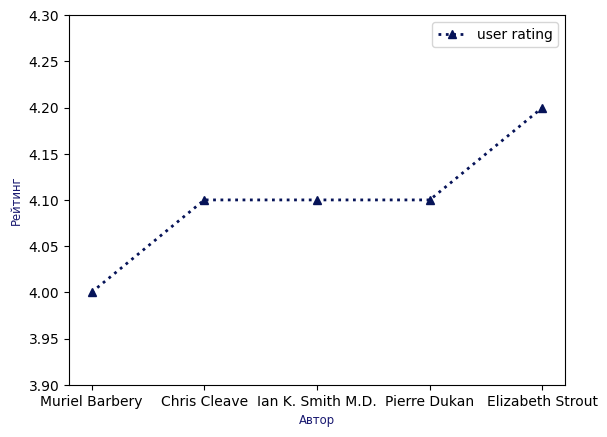

In [37]:
join_number_of_books_and_mean_rating = pd.concat([grouped_by_author.set_index('author'), grouped_by_author_mean_rating.set_index('author')], axis=1).sort_values(by=['name','user_rating']).reset_index()


plt.plot(
    join_number_of_books_and_mean_rating[:5]['author'],
    join_number_of_books_and_mean_rating[:5]['user_rating'],
    label="user rating",
    linestyle=":",
    color="#061358",
    linewidth=2,
    marker="^",
)
plt.ylim(3.9, 4.3)
plt.xlabel("Автор", fontsize="small", color="midnightblue")
plt.ylabel("Рейтинг", fontsize="small", color="midnightblue")
plt.legend()
plt.show()